In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from matplotlib.colors import LogNorm
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import h5py
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import sys
from matplotlib import pyplot
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold, SelectKBest, chi2

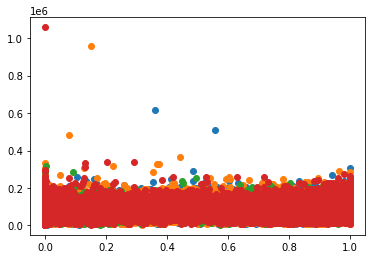

In [39]:
np.set_printoptions(threshold=sys.maxsize)

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[0]
        return pd.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')[1849:]
test  = load_data('test')

all_variables = ['p_Eratio', 'p_E5x7_Lr2', 'p_E3x5_Lr0','p_asy1', 'p_eClusterLr2', 'p_e235',
                 'p_E_Lr3_HiG', 'p_e255']

xtrain = train[all_variables].values
xtest = test[all_variables].values

scl = StandardScaler()
xtrain_norm = scl.fit_transform(xtrain)
xtest_norm = scl.fit_transform(xtest)
xtrain_norm = pd.DataFrame(xtrain_norm)
xtest_norm = pd.DataFrame(xtest_norm)

model = KMeans(n_clusters=4, random_state=367)

model.fit(xtrain_norm)

ytest  = model.predict(xtest_norm)

clusters = unique(ytest)

for cluster in clusters:
    row_ix = where(ytest == cluster)
    pyplot.scatter(xtrain[row_ix, 0], xtrain[row_ix, 1])
    
pyplot.show()

In [37]:
ytest = pd.DataFrame(ytest)
ytest.to_csv('Clustering_CooperNicolaysen_KMeans.csv', header = False, index = True)

In [ ]:
ytest = pd.DataFrame(ytest)
ytest.to_csv('Classification_CooperNIcolaysen_SCKIT.csv', header = False, index = True)